# Day 1.2: Quantum Teleportation

## 1. Objective
Transmit an unknown quantum state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ from Alice to Bob **without sending the physical particle**.
*(Note: This adheres to the No-Cloning Theorem because the original state at Alice's side is destroyed upon measurement).*

## 2. The Protocol
1.  **Entanglement Setup:** Create a Bell Pair between Alice ($q_1$) and Bob ($q_2$).
2.  **Alice's Operations:** Perform CNOT and H gates on the payload ($q_0$) and her entangled qubit ($q_1$), then measure them.
3.  **Classical Communication:** Alice sends the 2 classical bits of measurement results ($cr_0, cr_1$) to Bob.
4.  **Bob's Correction:** Based on the received bits, Bob applies specific gates to $q_2$ to reconstruct $|\psi\rangle$.

## 3. Correction Table (Truth Table)
Bob applies the following gates to $q_2$ based on Alice's measurement results (read as Binary $c_1 c_0$):

| Alice's Msg (Bits) | Error Type | Bob's Action (Gate) |
| :---: | :---: | :---: |
| **00** | None | $I$ (Do nothing) |
| **01** | Phase Flip | $Z$ |
| **10** | Bit Flip | $X$ |
| **11** | Both | $X$ and $Z$ |

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import numpy as np

print("Teleport system ready!")

Teleport system ready!


Civil message created at q0!


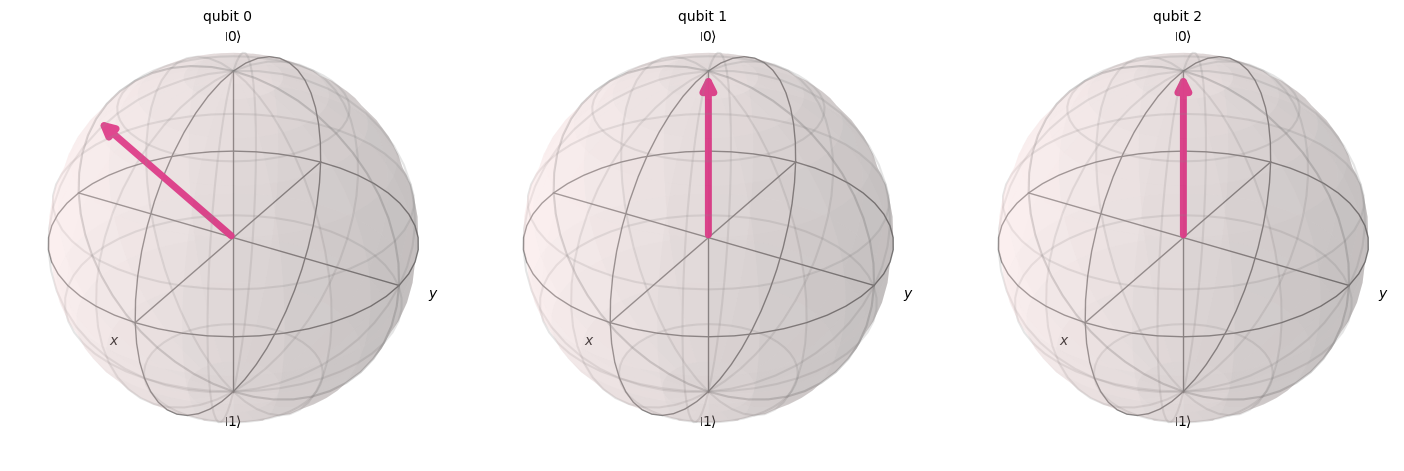

In [5]:
# Create a circuit with 3 qubits and 3 classical bits
qr = QuantumRegister(3, name="q")
cr = ClassicalRegister(3, name="c")
qc = QuantumCircuit(qr, cr)

# 1. Create a random state for q0 (Civil Message)
# Rotate q0 by a special angle (e.g., pi/3 around the X-axis)
qc.rx(np.pi/3, 0)
qc.barrier()

print("Civil message created at q0!")
psi_input = Statevector.from_instruction(qc)
plot_bloch_multivector(psi_input)

Quantum bridge established between q1 and q2


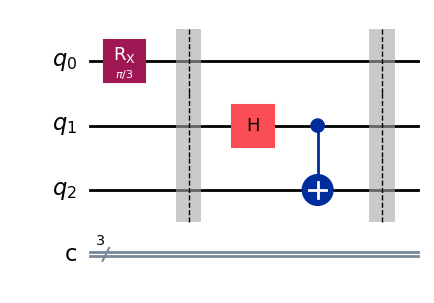

In [6]:
# 2. Create entanglement between q1 (Alice) and q2 (Bob)
qc.h(1)
qc.cx(1, 2)
qc.barrier()

print("Quantum bridge established between q1 and q2")
qc.draw('mpl')

Alice has finished measuring, q0 and q1 have collapsed!


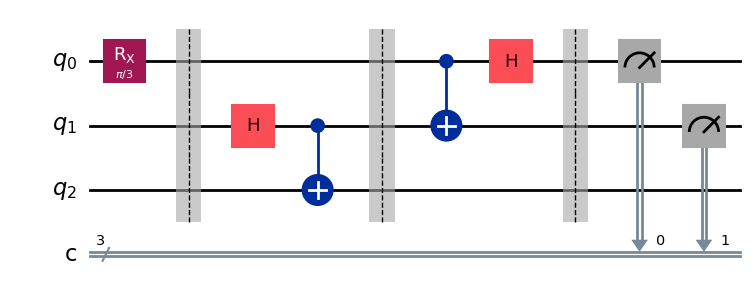

In [7]:
# 3. Alice performs CNOT and H on q0, q1
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# 4. Alice measures q0 and q1, writes the results to classical bits 0 and 1
qc.measure(0, 0)
qc.measure(1, 1)

print("Alice has finished measuring, q0 and q1 have collapsed!")
qc.draw('mpl')

Bob received the message and corrected the error!


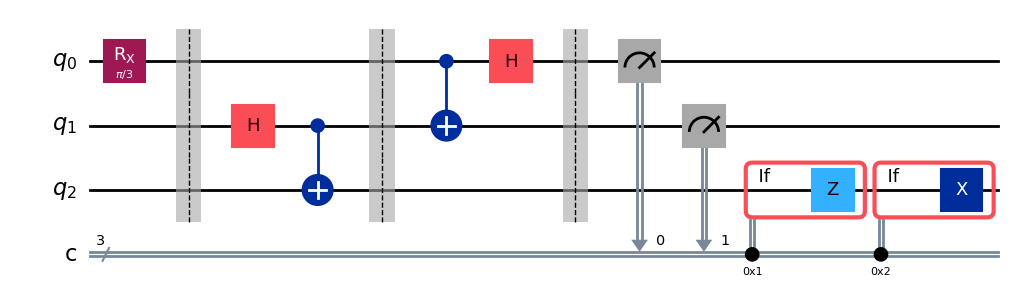

In [8]:
# 5. Bob applies error correction based on Alice's measurement results
# In Qiskit dynamic circuit:
with qc.if_test((cr, 1)): # If bit 0 (of q0) is 1 -> Apply Z
    qc.z(2)

with qc.if_test((cr, 2)): # If bit 1 (of q1) is 1 -> Apply X
    qc.x(2)

print("Bob received the message and corrected the error!")
qc.draw('mpl')

Result: {'000': 253, '001': 250, '010': 256, '011': 265}


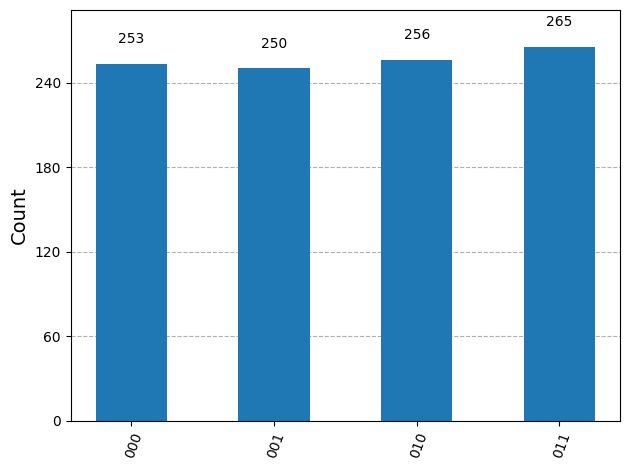

In [12]:
from qiskit_aer import AerSimulator

sim = AerSimulator()
transpiled_qc = transpile(qc, sim)
result = sim.run(transpiled_qc).result()
counts = result.get_counts()

print("Result:", counts)
plot_histogram(counts)